Heading text here

Introductory body text here
- Libraries (pip install instructions?)
- OpenSCAD
- conventions np, plt

In [77]:
import numpy as np
import matplotlib.pyplot as plt

Some text explaining the distribution and parameters

- Why beta? Known width (0 to 1)
- What are the parameters? How'd we choose them?

Explain results of linspace
- has numbins elements

In [78]:
from scipy.stats import beta

# beta distribution parameters
a, b = 2, 1.6

# get beta distribution array
betadist = beta.pdf(X, a, b)

# choose enough to have a relatively smooth curve without 
# creating so many facets that the 3D printer is slow
# choose an odd number so there is a definitive peak to the curve
numbins = 35

# set up linspace
X = np.linspace(0, 1, numbins)

Explain X and beta.pdf

In [79]:
print('X =\n', X)
print('betadist =\n', betadist)

X =
 [0.         0.02941176 0.05882353 0.08823529 0.11764706 0.14705882
 0.17647059 0.20588235 0.23529412 0.26470588 0.29411765 0.32352941
 0.35294118 0.38235294 0.41176471 0.44117647 0.47058824 0.5
 0.52941176 0.55882353 0.58823529 0.61764706 0.64705882 0.67647059
 0.70588235 0.73529412 0.76470588 0.79411765 0.82352941 0.85294118
 0.88235294 0.91176471 0.94117647 0.97058824 1.        ]
betadist =
 [0.         0.12018089 0.2359647  0.34726845 0.45400413 0.5560782
 0.65339098 0.74583603 0.83329938 0.9156586  0.9927818  1.06452643
 1.13073782 1.19124747 1.24587106 1.2944059  1.33662798 1.37228823
 1.40110782 1.42277236 1.43692427 1.44315298 1.44098179 1.4298501
 1.40908861 1.37788375 1.33522484 1.27982224 1.20997346 1.12332924
 1.016446   0.88381529 0.71531122 0.4866772  0.        ]


- Result will be a raw plot so you can see the general shape of what you're doing
- Save SVG for possible other uses like conversion into other formats or printing

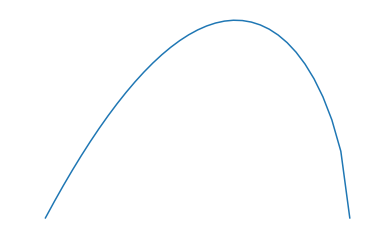

In [80]:
# turn off the axes so we only see the curve
plt.axis('off')

# plot the curve itself
plt.plot(X, beta.pdf(X, a, b))

# save the SVG file - ending the filename with SVG is enough to set the type
plt.savefig('beta.svg')

Explain openSCAD generator

In [81]:
def make_openscad(X, Y, filename):
    with open(filename, "w+") as fd:
        points = ""
        for x, y in zip(X, Y):
            points += "\t[{}, {}],\n".format(x, y)
        fd.write("""
points = [
{}];
linear_extrude(0.5)
    polygon(points);""".format(points))

# TODO: add tweaks to makea bottom line

# TODO: add tweaks to make expanded version and index over 

# TODO: add tweaks to subtract shapes
        
make_openscad(X, beta.pdf(X, a, b), "beta.scad")

Explain next steps in openscad here
- load file

[SHOULD LOOK LIKE THIS? - ADD image below?]

OpenSCAD save to XYZ format

Import to printer software and PRINT

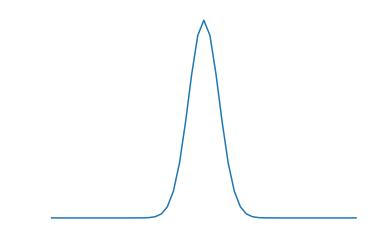

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#TODO: CONVERT TO NUMPY NORMAL DISTRIBUTION
#norm = np.random.normal(0, 1, 100)
x_axis = np.linspace(0, 1, 51)
norm = norm.pdf(x_axis, 0.5, 0.05) # find normalized analog
norm /= sum(norm)

plt.axis('off')
plt.plot(norm)
make_openscad(x_axis, norm, "normal.scad")
plt.savefig('norm.svg')

In [83]:
max(norm)

0.15957691216057304

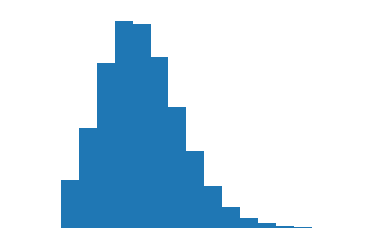

In [84]:
import numpy as np
import matplotlib.pyplot as plt

poisson = np.random.poisson(5, 100000)
plt.axis('off')
plt.hist(poisson, bins = 17)
plt.savefig('poisson.svg')

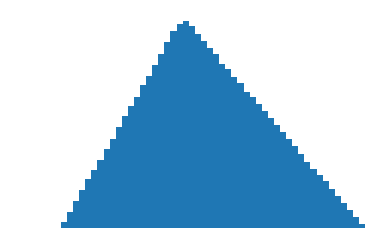

In [85]:
import numpy as np
import matplotlib.pyplot as plt

triangle = np.random.triangular(0, 0.4, 1, 1000000)
plt.axis('off')
plt.hist(triangle, bins = 50)
plt.savefig('triangle.svg')